In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans

%matplotlib inline

###The goal of this project is to use kmeans clustering to identify groups that shop at a grocery store

In [2]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\ta_feng_all_months_merged.csv')
#The worksheet we will be working with is for a Chinese grocery store between the months of November and Febraury.
#The data can be found here:
# https://www.kaggle.com/chiranjivdas09/ta-feng-grocery-dataset

In [3]:
df.head()

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE
0,11/1/2000,1104905,45-49,115,110411,4710199010372,2,24,30
1,11/1/2000,418683,45-49,115,120107,4710857472535,1,48,46
2,11/1/2000,1057331,35-39,115,100407,4710043654103,2,142,166
3,11/1/2000,1849332,45-49,Others,120108,4710126092129,1,32,38
4,11/1/2000,1981995,50-54,115,100205,4710176021445,1,14,18


In [4]:
#First, we will create some additional columns that to indicate day of the week, month, and season. This will give us the
#ability to look at different segments during different times of the year.
df['dates'] = pd.to_datetime(df['TRANSACTION_DT'])

In [5]:
df['Day_of_Week'] = df['dates'].dt.day_name()

In [7]:
#This function will return a number for each day of the week.
#Sunday is being considered the begginning of the week and Saturday is the end
#This could also be re-written to consider Sunday the end of the week to see if people shop on weekdays or weekends
def numeric_day(x):
    if x == 'Sunday':
        return 1
    elif x == 'Monday':
        return 2
    elif x == 'Tuesday':
        return 3
    elif x == 'Wednesday':
        return 4
    elif x == 'Thursday':
        return 5
    elif x == 'Friday':
        return 6
    elif x == 'Saturday':
        return 7

In [8]:
##Now, we will create a new column with this data
df['numeric_date'] = df['Day_of_Week'].apply(numeric_day)

In [11]:
###Lets also take a look at purchases by season
df['Month'] = df['dates'].dt.month_name()

In [12]:
def season(x):
    if ((x == 'December') | (x == 'January') | (x == 'February')):
        return 'Winter'
    elif ((x == 'March') | (x == 'April') | (x == 'May')):
        return 'Spring'
    elif ((x == 'June') | (x == 'July') | (x == 'August')):
        return 'Summer'
    elif ((x == 'September') | (x == 'October') | (x == 'November')):
        return 'Fall'
    else:
        return 'Error'

In [13]:
df['Season'] = df['Month'].apply(season)

In [14]:
df['Season'].value_counts()

Winter    594119
Fall      223622
Name: Season, dtype: int64

In [15]:
df['Month'].value_counts()

November    223622
January     216864
February    199039
December    178216
Name: Month, dtype: int64

In [16]:
###It looks like all of the data takes place between November and February so we will be analyzing the end of year and beginning
#of year patterns.  We will also create a column for pre-Christmas and post christmas to see if spending changes significantly

In [17]:
df['Day_of_Month'] = df['dates'].dt.day

In [19]:
df['Day_of_Month'] = pd.to_numeric(df['Day_of_Month'])

In [21]:
def xmas(x):
    if ((x == 'November') | (x == 'December')):
        return 'pre-holiday'
    else:
        return 'post-holiday'

In [22]:
df['Holiday'] = df['Month'].apply(xmas)

In [23]:
##Lastly, lets make sure all of the variables we want to use are in numerical form.  Lets look at the columns and create
#dummy variables as necessary.
df.columns

Index(['TRANSACTION_DT', 'CUSTOMER_ID', 'AGE_GROUP', 'PIN_CODE',
       'PRODUCT_SUBCLASS', 'PRODUCT_ID', 'AMOUNT', 'ASSET', 'SALES_PRICE',
       'dates', 'Day_of_Week', 'numeric_date', 'Month', 'Season',
       'Day_of_Month', 'Holiday'],
      dtype='object')

In [24]:
subclass = df[['CUSTOMER_ID', 'PRODUCT_SUBCLASS', 'AGE_GROUP', 'AMOUNT', 'SALES_PRICE', 'Day_of_Week', 
              'Month', 'Holiday']]

In [25]:
sc = pd.get_dummies(subclass)

In [38]:
sc.columns

Index(['CUSTOMER_ID', 'PRODUCT_SUBCLASS', 'AMOUNT', 'SALES_PRICE',
       'AGE_GROUP_25-29', 'AGE_GROUP_30-34', 'AGE_GROUP_35-39',
       'AGE_GROUP_40-44', 'AGE_GROUP_45-49', 'AGE_GROUP_50-54',
       'AGE_GROUP_55-59', 'AGE_GROUP_60-64', 'AGE_GROUP_<25', 'AGE_GROUP_>65',
       'Day_of_Week_Friday', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday', 'Month_December', 'Month_February',
       'Month_January', 'Month_November', 'Holiday_post-holiday',
       'Holiday_pre-holiday'],
      dtype='object')

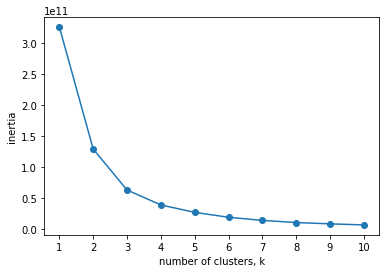

In [47]:
ks = range(1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(sc.iloc[:, 2:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
#It looks like we will have 3 or 4 clusters.  Let's take a look at both

In [65]:
cluster = KMeans(n_clusters=3)
sc['cluster'] = cluster.fit_predict(sc.iloc[:, 2:])
sc['cluster'].value_counts()
#This group doesn't look very balanced.  It looks like most of these customers are too similar

0    817648
2        92
1         1
Name: cluster, dtype: int64

In [66]:
cluster = KMeans(n_clusters=4)
sc['cluster'] = cluster.fit_predict(sc.iloc[:, 2:])
sc['cluster'].value_counts()
#This looks a little bit better.  Most of the shoppers are very similar though.

1    806840
0     10814
3        86
2         1
Name: cluster, dtype: int64

In [68]:
cluster0 = sc[sc['cluster'] == 0]
cluster1 = sc[sc['cluster'] == 1]

In [69]:
cluster0.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,AMOUNT,SALES_PRICE,AGE_GROUP_25-29,AGE_GROUP_30-34,AGE_GROUP_35-39,AGE_GROUP_40-44,AGE_GROUP_45-49,AGE_GROUP_50-54,...,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Month_December,Month_February,Month_January,Month_November,Holiday_post-holiday,Holiday_pre-holiday,cluster
count,1.081400e+04,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,...,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,10814.000000,10814.0
mean,1.457310e+06,511420.527834,3.350194,1615.823839,0.097189,0.203625,0.219530,0.165896,0.112077,0.057241,...,0.111892,0.121232,0.116331,0.191511,0.191696,0.334844,0.281949,0.526540,0.473460,0.0
std,6.938235e+05,192565.605706,13.367338,1176.581173,0.296228,0.402712,0.413948,0.372005,0.315476,0.232313,...,0.315248,0.326411,0.320636,0.393508,0.393653,0.471958,0.449970,0.499318,0.499318,0.0
min,2.189000e+03,100102.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.096504e+06,470102.000000,1.000000,1009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.630306e+06,560201.000000,1.000000,1242.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,1.887051e+06,711402.000000,3.000000,1752.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0
max,2.000200e+07,780509.000000,852.000000,14672.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [70]:
cluster1.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,AMOUNT,SALES_PRICE,AGE_GROUP_25-29,AGE_GROUP_30-34,AGE_GROUP_35-39,AGE_GROUP_40-44,AGE_GROUP_45-49,AGE_GROUP_50-54,...,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Month_December,Month_February,Month_January,Month_November,Holiday_post-holiday,Holiday_pre-holiday,cluster
count,8.068400e+05,806840.000000,806840.000000,806840.000000,806840.00000,806840.000000,806840.000000,806840.000000,806840.000000,806840.00000,...,806840.000000,806840.000000,806840.000000,806840.000000,806840.000000,806840.000000,806840.000000,806840.000000,806840.000000,806840.0
mean,1.405873e+06,281888.681142,1.344348,108.486376,0.08101,0.171779,0.221618,0.184944,0.122077,0.06581,...,0.110225,0.111259,0.104932,0.218268,0.244115,0.264253,0.273364,0.508368,0.491632,1.0
std,7.496760e+05,225262.998566,1.017977,112.319206,0.27285,0.377188,0.415335,0.388252,0.327375,0.24795,...,0.313170,0.314452,0.306465,0.413070,0.429562,0.440935,0.445686,0.499930,0.499930,0.0
min,1.069000e+03,100101.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.663510e+05,110105.000000,1.000000,42.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,1.587203e+06,130102.000000,1.000000,75.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
75%,1.854220e+06,520144.000000,1.000000,129.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
max,2.000200e+07,780510.000000,96.000000,860.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
##It looks like customers in cluster 0 tend to buy more items at a time and pay a higher overall bill
#They have a much higher standard deviation in the amount than cluster 1
##Cluster 1 customers tend to buy just a few items and pay more in price per item


In [31]:
##Let's take a look at the different age groups
g2529 = sc[sc['AGE_GROUP_25-29'] == 1]
g3034 = sc[sc['AGE_GROUP_30-34'] == 1]
g3539 = sc[sc['AGE_GROUP_35-39'] == 1]
g4044 = sc[sc['AGE_GROUP_40-44'] == 1]
g4549 = sc[sc['AGE_GROUP_45-49'] == 1]
g5054 = sc[sc['AGE_GROUP_50-54'] == 1]
g5559 = sc[sc['AGE_GROUP_55-59'] == 1]
g6064 = sc[sc['AGE_GROUP_60-64'] == 1]
gunder25 = sc[sc['AGE_GROUP_<25'] == 1]
gover65 = sc[sc['AGE_GROUP_>65'] == 1]

In [73]:
##First, let's take a look at customers in the age group 25-29
#We will start by removing the age groups since everyone will be in the same age group
g25_29 = g2529[['CUSTOMER_ID', 'PRODUCT_SUBCLASS', 'AMOUNT', 'SALES_PRICE',
       'Day_of_Week_Friday', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday', 'Month_December', 'Month_February',
       'Month_January', 'Month_November', 'Holiday_post-holiday',
       'Holiday_pre-holiday']]

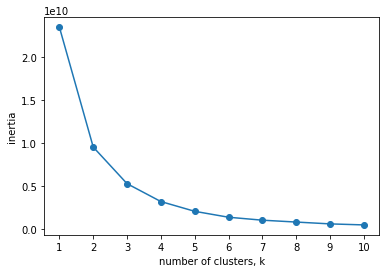

In [74]:
ks = range(1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(g25_29.iloc[:, 2:])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
#It looks like we once again have either 3 or 4 clusters.  Let's take a look at both

In [75]:
cluster = KMeans(n_clusters=3)
g25_29['cluster'] = cluster.fit_predict(g25_29.iloc[:, 2:])
g25_29['cluster'].value_counts()
#It looks like most of the shoppers are too similar for 3 clusters

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    66390
2       38
1        4
Name: cluster, dtype: int64

In [76]:
cluster = KMeans(n_clusters=4)
g25_29['cluster'] = cluster.fit_predict(g25_29.iloc[:, 2:])
g25_29['cluster'].value_counts()
#This looks very similar to the overall data. It looks like there are a few different shoppers that have very unique shopping
#habits.  It is possible that these people don't go very often or have some other reason for going.
#Among the clusters with more people though, there is enough difference between the two groups that we can identify
#distinct groups.

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    64663
3     1728
2       37
1        4
Name: cluster, dtype: int64

In [77]:
cluster0 = g25_29[g25_29['cluster'] == 0]
cluster3 = g25_29[g25_29['cluster'] == 3]

In [78]:
cluster0.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,AMOUNT,SALES_PRICE,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Month_December,Month_February,Month_January,Month_November,Holiday_post-holiday,Holiday_pre-holiday,cluster
count,6.466300e+04,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.000000,64663.0
mean,1.615134e+06,302148.292578,1.311631,104.346179,0.103042,0.138812,0.174319,0.235359,0.122033,0.118058,0.108377,0.225972,0.239859,0.243988,0.290181,0.483847,0.516153,0.0
std,5.401856e+05,227697.061756,0.970437,99.841365,0.304016,0.345753,0.379387,0.424226,0.327326,0.322680,0.310859,0.418224,0.427001,0.429489,0.453849,0.499743,0.499743,0.0
min,1.597400e+04,100101.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.494150e+06,110108.000000,1.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.752403e+06,130205.000000,1.000000,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,2.019604e+06,530103.000000,1.000000,129.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0
max,2.179643e+06,780510.000000,72.000000,660.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [79]:
cluster3.describe()

,CUSTOMER_ID,PRODUCT_SUBCLASS,AMOUNT,SALES_PRICE,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,Month_December,Month_February,Month_January,Month_November,Holiday_post-holiday,Holiday_pre-holiday,cluster
count,1.728000e+03,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.0
mean,1.635787e+06,522737.750579,2.644676,1219.463542,0.098958,0.154514,0.164931,0.217593,0.124421,0.122106,0.117477,0.208333,0.213542,0.284144,0.293981,0.497685,0.502315,3.0
std,5.117324e+05,173091.222025,4.057479,792.959323,0.298693,0.361545,0.371225,0.412728,0.330157,0.327504,0.322081,0.406234,0.409925,0.451136,0.455715,0.500139,0.500139,0.0
min,1.817300e+04,100101.000000,1.000000,662.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,1.549894e+06,470106.000000,1.000000,780.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
50%,1.766882e+06,560201.000000,1.000000,945.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
75%,2.011493e+06,560505.750000,3.000000,1306.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.0
max,2.179513e+06,780504.000000,92.000000,7998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0


In [ ]:
#The data looks very similar to the overall data.  We have people who buy more things at once and people who get what they need
#for the day and move on